# 온라인 쇼핑몰 매출관계 분석

- 국가통계포털 https://kosis.kr/index/index.do
- 온라인쇼핑몰 판매매체별 / 상품군별거래액
- 합계 등을 제외하고 선택(전기전자통신 2020년 전후로 분리되어서 미리 합침)
- 행렬을 전환
<div style="display:flex">
    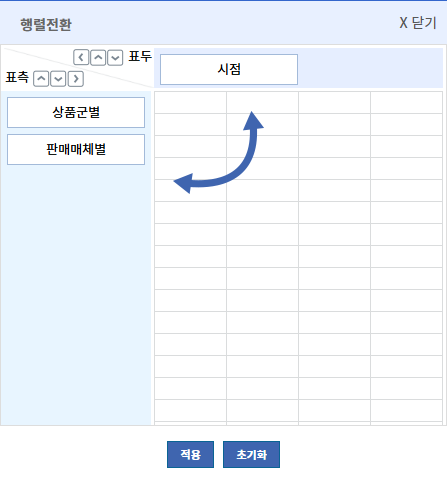
</div>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# import matplotlib.dates as mdates

import pandas as pd
from datetime import datetime

In [2]:
# font 설정 D2coding
d2_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
matplotlib.rcParams["font.family"] = "D2Coding"

In [3]:
file_path = "./ref/온라인쇼핑몰_판매매체별_상품군별거래액.csv"
ori = pd.read_csv(file_path, encoding="EUC-KR") # utf-8
ori.columns = ["category","date","internet","mobile"]
ori.tail()

,category,date,internet,mobile
2203,기타,2024.08,61304,120200
2204,기타,2024.09,63863,126583
2205,기타,2024.10,68403,128216
2206,기타,2024.11 p),73246,135527
2207,기타,2024.12 p),75613,144134


In [4]:
print("수정전")
print(ori['date'].tail())
ori['date'] = ori['date'].map(lambda x: x.rstrip(' p)')) # 리플레이스 활용해도됨
print("수정후")
print(ori['date'].tail())

수정전
2203       2024.08
2204       2024.09
2205       2024.10
2206    2024.11 p)
2207    2024.12 p)
Name: date, dtype: object
수정후
2203    2024.08
2204    2024.09
2205    2024.10
2206    2024.11
2207    2024.12
Name: date, dtype: object


In [5]:
ori['date'] = pd.to_datetime(ori["date"], format='%Y.%m')
ori.dtypes
ori.tail()

,category,date,internet,mobile
2203,기타,2024-08-01,61304,120200
2204,기타,2024-09-01,63863,126583
2205,기타,2024-10-01,68403,128216
2206,기타,2024-11-01,73246,135527
2207,기타,2024-12-01,75613,144134


In [6]:
ex1_data = ori.copy()
# ex1_data[50:90] # 컴퓨터 및 주변기기
# ex1_data[ex1_data['category']== '음식서비스'] # '컴퓨터 및 주변기기', '의복', '신발', '가방', '음·식료품', '음식서비스', '애완용품', '여행 및 교통서비스'
obj = ['컴퓨터 및 주변기기', '농축수산물', '의복', '신발', '가방', '음·식료품', '음식서비스', '애완용품', '여행 및 교통서비스']
ex1_data = ex1_data[ex1_data['category'].isin(obj)]
ex1_data.sample(5) # 랜덤해서 뽑아줌

,category,date,internet,mobile
504,신발,2019-01-01,57560,102086
476,의복,2024-09-01,411669,1116919
1922,음식서비스,2017-03-01,30493,161602
530,신발,2021-03-01,97134,217147
1548,애완용품,2018-01-01,24538,47640


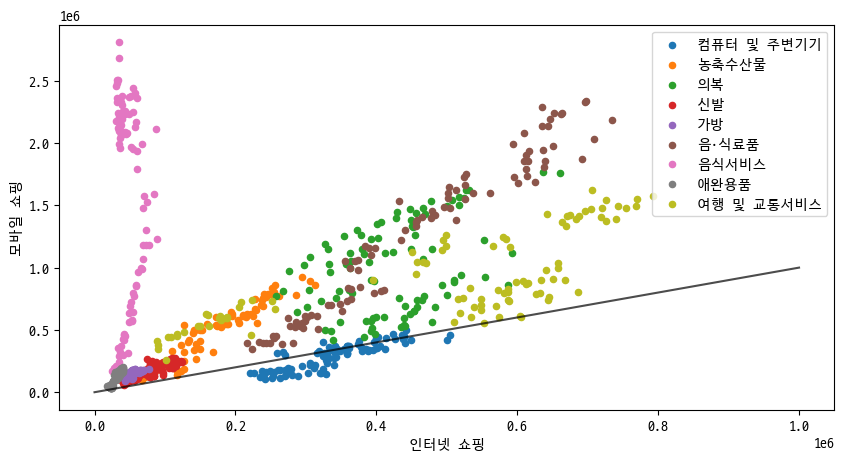

In [7]:
fig , ax = plt.subplots(figsize=(10,5))

category = obj # ['컴퓨터 및 주변기기', '농축수산물', '의복', '신발', '가방', '음·식료품', '음식서비스', '애완용품', '여행 및 교통서비스']

for cate in obj:
    category_data = ex1_data[ex1_data['category'] == cate]
    x_data = category_data['internet']
    y_data = category_data['mobile']
    ax.scatter( x_data , y_data, s = 20 , label = cate )


ax.set_xlabel("인터넷 쇼핑")
ax.set_ylabel("모바일 쇼핑")
ax.legend(loc="best")
ax.plot([0,1000000],[0,1000000],'k-',alpha=0.7)
plt.show() # 거의 대부분 상품들이 모바일에서 많이 팔렸다는 걸 볼수있음
# print(category_data,x_data,y_data)

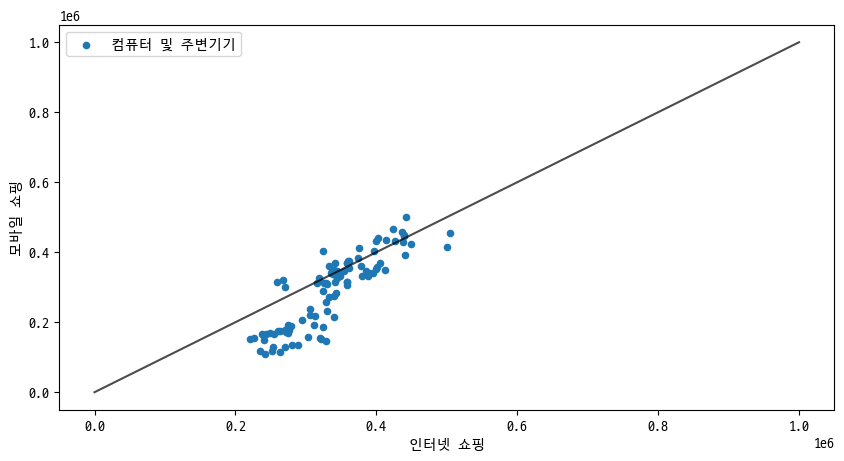

In [45]:
computer_data = ex1_data[ex1_data['category'] == '컴퓨터 및 주변기기']

fig, ax = plt.subplots(figsize=(10, 5))

x_data = computer_data['internet']
y_data = computer_data['mobile']

ax.scatter(x_data, y_data, s = 20, label = '컴퓨터 및 주변기기')

ax.set_xlabel("인터넷 쇼핑")
ax.set_ylabel("모바일 쇼핑")


ax.legend(loc="best")

ax.plot([0, 1000000], [0, 1000000], 'k-', alpha=0.7)

plt.show() 

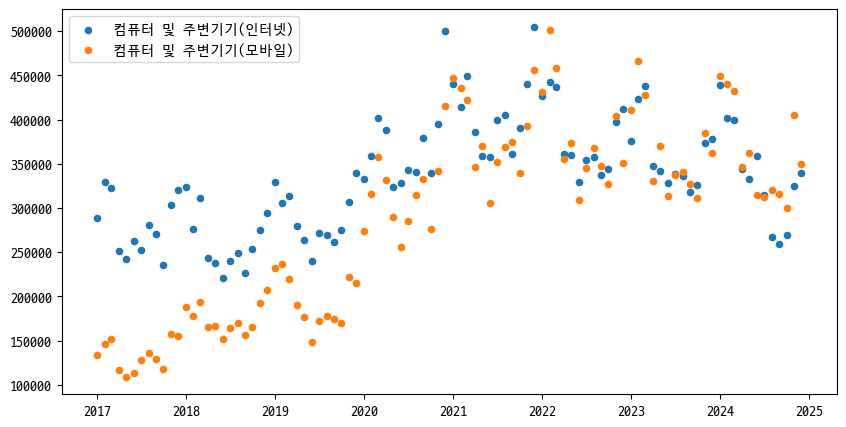

In [59]:
fig, ax = plt.subplots(figsize=(10, 5))

tdata = ex1_data[ex1_data['category'] == obj[0]]['date']
second = ex1_data[ex1_data['category'] == obj[0]]
idata = second['internet']
mdata = second['mobile']

ax.scatter(tdata, idata, s=20, label=obj[0] + '(인터넷)')
ax.scatter(tdata, mdata, s=20, label=obj[0] + '(모바일)')
ax.legend()

plt.show()